In [2]:
#Import requirements library
import pandas as pd
import numpy as np

1. IMPORT DATA

In [3]:
#Read excel data
pd.set_option('display.float_format', '{:.2f}'.format)
#pd.set_option("display.max_rows", None)
traffic = pd.read_excel(r"C:\Users\ndqba\Downloads\Sample_Customore_Test_case\Sample_Customore_Traffic_raw.xlsx")

In [4]:
#View sample data
traffic

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,google / cpc,407950,344502,723208,0.62,3.56,176.03,0.01,6566,6656088123.79
1,youtube / social,77785,55537,163447,0.79,2.24,89.94,0.01,957,842907936.03
2,(direct) / (none),64653,60181,108534,0.55,4.12,200.43,0.01,1048,1040851446.85
3,facebook / social,48721,32781,176662,0.84,1.86,73.21,0.00,500,534485686.27
4,youtube.com / referral,27718,17774,42464,0.64,2.98,148.44,0.01,508,402541914.82
...,...,...,...,...,...,...,...,...,...,...
193,www-dienmayxanh-com.cdn.ampproject.org / local...,1,0,1,1.00,1.00,0.00,0.00,0,0.00
194,xiaomiviet.vn / local_display,1,0,2,0.00,4.50,113.00,0.00,0,0.00
195,xnxx.com / local_display,1,0,2,0.50,1.50,6.00,0.00,0,0.00
196,zalo / (not set),1,1,1,1.00,1.00,0.00,0.00,0,0.00


2. PRE-PROCESSING DATA

In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Source / Medium            197 non-null    object 
 1   Users                      198 non-null    int64  
 2   New Users                  198 non-null    int64  
 3   Sessions                   198 non-null    int64  
 4   Bounce Rate                198 non-null    float64
 5   Pages / Session            198 non-null    float64
 6   Avg. Session Duration      198 non-null    float64
 7   Ecommerce Conversion Rate  198 non-null    float64
 8   Transactions               198 non-null    int64  
 9   Revenue                    198 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 15.6+ KB


In [6]:
#Create new database
newTraffic = traffic.copy()
newTraffic.drop(newTraffic.tail(1).index, inplace=True) #drop sum row
newTraffic.head(10)

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,google / cpc,407950,344502,723208,0.62,3.56,176.03,0.01,6566,6656088123.79
1,youtube / social,77785,55537,163447,0.79,2.24,89.94,0.01,957,842907936.03
2,(direct) / (none),64653,60181,108534,0.55,4.12,200.43,0.01,1048,1040851446.85
3,facebook / social,48721,32781,176662,0.84,1.86,73.21,0.00,500,534485686.27
4,youtube.com / referral,27718,17774,42464,0.64,2.98,148.44,0.01,508,402541914.82
5,m.facebook.com / referral,14373,10110,17631,0.70,2.24,87.39,0.01,127,114188784.45
6,l.facebook.com / referral,3661,1712,7144,0.37,6.87,736.73,0.01,103,150801642.13
7,zalo / zalo,2782,2400,4029,0.67,2.53,147.25,0.01,43,37327813.27
8,youtube / (not set),1741,875,2311,0.79,2.08,68.36,0.00,7,9263413.72
9,facebook.com / referral,1594,694,2557,0.50,4.67,288.27,0.01,29,20931450.21


In [7]:
newTraffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Source / Medium            197 non-null    object 
 1   Users                      197 non-null    int64  
 2   New Users                  197 non-null    int64  
 3   Sessions                   197 non-null    int64  
 4   Bounce Rate                197 non-null    float64
 5   Pages / Session            197 non-null    float64
 6   Avg. Session Duration      197 non-null    float64
 7   Ecommerce Conversion Rate  197 non-null    float64
 8   Transactions               197 non-null    int64  
 9   Revenue                    197 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 15.5+ KB


In [8]:
newTraffic.describe()

,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
count,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00
mean,3334.97,2688.74,6393.16,0.60,3.29,166.11,0.00,50.97,50794279.88
std,30122.42,25300.98,54720.60,0.35,3.51,320.15,0.02,479.99,484900580.92
min,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,1.00,0.36,1.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,4.00,0.57,2.25,68.00,0.00,0.00,0.00
75%,4.00,2.00,11.00,1.00,4.60,237.82,0.00,0.00,0.00
max,407950.00,344502.00,723208.00,1.00,39.00,3379.36,0.12,6566.00,6656088123.79


In [9]:
def splitSource(sourceStr, pos, splWord):
    """function to split Souce and Medium"""
    myString = sourceStr
    splitWord = splWord
    resString = myString.partition(splitWord)[pos]
    return resString

In [10]:
#Create source list
sourceList = []
for i in range(len(newTraffic)):
    sourceList.append(splitSource(newTraffic["Source / Medium"][i], 0, "/")) #extract source from source / medium
    sourceList[i] = splitSource(sourceList[i], 0, " ") #remove " "

print(sourceList)

['google', 'youtube', '(direct)', 'facebook', 'youtube.com', 'm.facebook.com', 'l.facebook.com', 'zalo', 'youtube', 'facebook.com', 'googleapis.com', 'instagram', 'newsletter', 'yahoo', 'bing', 'newsletter', 'vn.search.yahoo.com', 'newsletter', 'lm.facebook.com', 'l.messenger.com', '123.20.207.23', 'duckduckgo', 'coccoc.com', 'ecosia.org', 'linhkiendoc.com', 'ecosia.org', 'mlr.itim.vn', 'tinhte.vn', 'yandex', 'l.workplace.com', 'baidu.com', 'l.instagram.com', 'm.youtube.com', 'vnexpress.net', 'us20.campaign-archive.com', 'yandex.ru', 'twitter', 'googleweblight.com', 'mailchi.mp', 'us7.campaign-archive.com', 'cn.bing.com', 'websosanh.vn', 'adguard.com', 'cuahangtcs.com', 'google', 'google.com', 'news.zing.vn', 'ttvnol.com', 'webredirect.garenanow.com', 'genk.vn', 'getpocket.com', 'ahrefs.tool.buyseotools.io', 'ahrefs3.tool.buyseotools.io', 'ankersacnhanh.com', 'bit.ly', 'instagram.com', 'm.genk.vn', 'm.kenh14.vn', 'muare.club', 'new-cms.icheck.com.vn', 'out.easycounter.com', 'xvideos.co

In [11]:
#Create medium list
mediumList = []
for i in range(len(newTraffic)):
    mediumList.append(splitSource(newTraffic["Source / Medium"][i], 2, "/")) #extract medium from source / medium
    mediumList[i] = splitSource(mediumList[i], 2, " ") #remove " "

print(mediumList)

['cpc', 'social', '(none)', 'social', 'referral', 'referral', 'referral', 'zalo', '(not set)', 'referral', 'referral', 'social', 'email', 'organic', 'organic', 'email', 'local_display', 'email', 'referral', 'local_display', 'local_display', 'organic', 'local_display', 'local_display', 'local_display', 'organic', 'local_display', 'local_display', 'organic', 'local_display', 'local_display', 'referral', 'referral', 'local_display', 'local_display', 'local_display', 'social', 'referral', 'referral', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'cpc', 'referral', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'referral', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_display', 'local_d

In [12]:
newTraffic["source"] = sourceList #create medium list
newTraffic["medium"] = mediumList #create medium column
newTraffic.head(15)

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,source,medium
0,google / cpc,407950,344502,723208,0.62,3.56,176.03,0.01,6566,6656088123.79,google,cpc
1,youtube / social,77785,55537,163447,0.79,2.24,89.94,0.01,957,842907936.03,youtube,social
2,(direct) / (none),64653,60181,108534,0.55,4.12,200.43,0.01,1048,1040851446.85,(direct),(none)
3,facebook / social,48721,32781,176662,0.84,1.86,73.21,0.00,500,534485686.27,facebook,social
4,youtube.com / referral,27718,17774,42464,0.64,2.98,148.44,0.01,508,402541914.82,youtube.com,referral
5,m.facebook.com / referral,14373,10110,17631,0.70,2.24,87.39,0.01,127,114188784.45,m.facebook.com,referral
6,l.facebook.com / referral,3661,1712,7144,0.37,6.87,736.73,0.01,103,150801642.13,l.facebook.com,referral
7,zalo / zalo,2782,2400,4029,0.67,2.53,147.25,0.01,43,37327813.27,zalo,zalo
8,youtube / (not set),1741,875,2311,0.79,2.08,68.36,0.00,7,9263413.72,youtube,(not set)
9,facebook.com / referral,1594,694,2557,0.50,4.67,288.27,0.01,29,20931450.21,facebook.com,referral


In [13]:
#Compute percent of user, new user, sessions, revenue on total
newTraffic["Users (%)"] = (newTraffic["Users"]/newTraffic["Users"].sum())*100
newTraffic["New Users (%)"] = (newTraffic["New Users"]/newTraffic["New Users"].sum())*100
newTraffic["Sessions (%)"] = (newTraffic["Sessions"]/newTraffic["Sessions"].sum())*100
newTraffic["Revenue (%)"] = (newTraffic["Revenue"]/newTraffic["Revenue"].sum())*100
newTraffic["Mean Revenue/Transactions"] = newTraffic["Revenue"]/newTraffic["Transactions"]
newTraffic.head(10)

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,source,medium,Users (%),New Users (%),Sessions (%),Revenue (%),Mean Revenue/Transactions
0,google / cpc,407950,344502,723208,0.62,3.56,176.03,0.01,6566,6656088123.79,google,cpc,62.09,65.04,57.42,66.52,1013720.40
1,youtube / social,77785,55537,163447,0.79,2.24,89.94,0.01,957,842907936.03,youtube,social,11.84,10.48,12.98,8.42,880781.54
2,(direct) / (none),64653,60181,108534,0.55,4.12,200.43,0.01,1048,1040851446.85,(direct),(none),9.84,11.36,8.62,10.40,993178.86
3,facebook / social,48721,32781,176662,0.84,1.86,73.21,0.00,500,534485686.27,facebook,social,7.42,6.19,14.03,5.34,1068971.37
4,youtube.com / referral,27718,17774,42464,0.64,2.98,148.44,0.01,508,402541914.82,youtube.com,referral,4.22,3.36,3.37,4.02,792405.34
5,m.facebook.com / referral,14373,10110,17631,0.70,2.24,87.39,0.01,127,114188784.45,m.facebook.com,referral,2.19,1.91,1.40,1.14,899124.29
6,l.facebook.com / referral,3661,1712,7144,0.37,6.87,736.73,0.01,103,150801642.13,l.facebook.com,referral,0.56,0.32,0.57,1.51,1464093.61
7,zalo / zalo,2782,2400,4029,0.67,2.53,147.25,0.01,43,37327813.27,zalo,zalo,0.42,0.45,0.32,0.37,868088.68
8,youtube / (not set),1741,875,2311,0.79,2.08,68.36,0.00,7,9263413.72,youtube,(not set),0.26,0.17,0.18,0.09,1323344.82
9,facebook.com / referral,1594,694,2557,0.50,4.67,288.27,0.01,29,20931450.21,facebook.com,referral,0.24,0.13,0.20,0.21,721774.15


3. DATA EXPLORATORY

3.1. NEW USERS BY SOURCE AND MEDIUM

In [14]:
#Import requirement library
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
newTrafficRevenue = pd.DataFrame()
newTrafficRevenue = newTraffic.query('Revenue>20000000') #query data has revenue!=0
newTrafficRevenue = newTrafficRevenue.reset_index(drop=True)
newTrafficRevenue

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,source,medium,Users (%),New Users (%),Sessions (%),Revenue (%),Mean Revenue/Transactions
0,google / cpc,407950,344502,723208,0.62,3.56,176.03,0.01,6566,6656088123.79,google,cpc,62.09,65.04,57.42,66.52,1013720.40
1,youtube / social,77785,55537,163447,0.79,2.24,89.94,0.01,957,842907936.03,youtube,social,11.84,10.48,12.98,8.42,880781.54
2,(direct) / (none),64653,60181,108534,0.55,4.12,200.43,0.01,1048,1040851446.85,(direct),(none),9.84,11.36,8.62,10.40,993178.86
3,facebook / social,48721,32781,176662,0.84,1.86,73.21,0.00,500,534485686.27,facebook,social,7.42,6.19,14.03,5.34,1068971.37
4,youtube.com / referral,27718,17774,42464,0.64,2.98,148.44,0.01,508,402541914.82,youtube.com,referral,4.22,3.36,3.37,4.02,792405.34
5,m.facebook.com / referral,14373,10110,17631,0.70,2.24,87.39,0.01,127,114188784.45,m.facebook.com,referral,2.19,1.91,1.40,1.14,899124.29
6,l.facebook.com / referral,3661,1712,7144,0.37,6.87,736.73,0.01,103,150801642.13,l.facebook.com,referral,0.56,0.32,0.57,1.51,1464093.61
7,zalo / zalo,2782,2400,4029,0.67,2.53,147.25,0.01,43,37327813.27,zalo,zalo,0.42,0.45,0.32,0.37,868088.68
8,facebook.com / referral,1594,694,2557,0.50,4.67,288.27,0.01,29,20931450.21,facebook.com,referral,0.24,0.13,0.20,0.21,721774.15
9,newsletter / email,781,393,2168,0.40,5.88,332.00,0.03,61,98910794.42,newsletter,email,0.12,0.07,0.17,0.99,1621488.43


C:\Users\ndqba\AppData\Local\Temp\ipykernel_14132\2262520093.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) #disable scientific notation


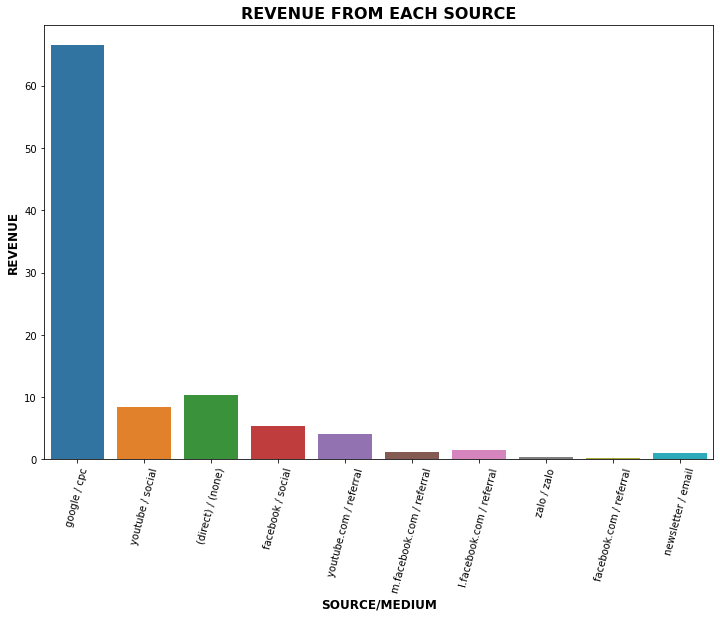

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(data=newTrafficRevenue, x="Source / Medium", y="Revenue (%)")
plt.title("REVENUE FROM EACH SOURCE", fontsize=16, fontweight='bold')
plt.xlabel("SOURCE/MEDIUM", fontsize=12, fontweight='bold')
plt.ylabel("REVENUE", fontsize=12, fontweight='bold')
current_values = plt.gca().get_yticks() #get current labels
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) #disable scientific notation
plt.xticks(rotation=75)
plt.savefig("REVENUE_FROM_EACH_SOURCE.png", bbox_inches = 'tight')
plt.show()

In [17]:
#Reshape dataframe
usersDF = newTrafficRevenue.filter(["Source / Medium", "Users", "New Users"])
usersDF = pd.melt(usersDF, id_vars="Source / Medium", var_name="Type of Users", value_name="Count")
usersDF

,Source / Medium,Type of Users,Count
0,google / cpc,Users,407950
1,youtube / social,Users,77785
2,(direct) / (none),Users,64653
3,facebook / social,Users,48721
4,youtube.com / referral,Users,27718
5,m.facebook.com / referral,Users,14373
6,l.facebook.com / referral,Users,3661
7,zalo / zalo,Users,2782
8,facebook.com / referral,Users,1594
9,newsletter / email,Users,781


<Figure size 864x576 with 0 Axes>

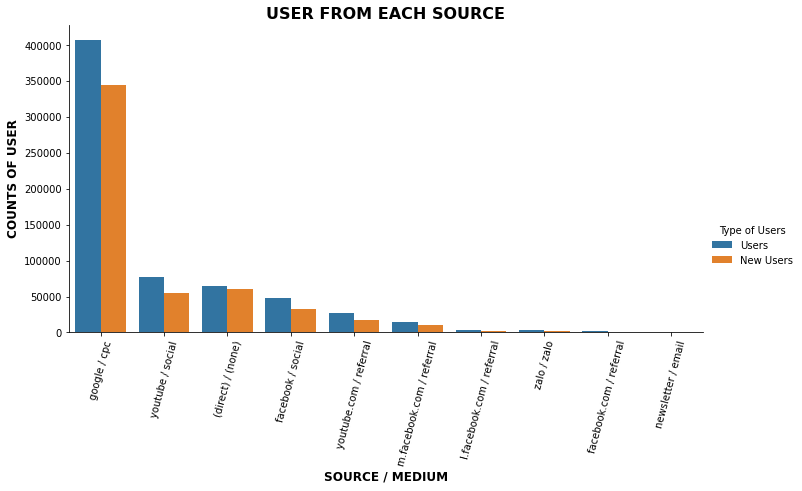

In [18]:
plt.figure(figsize=(12, 8))
sns.catplot(data=usersDF, x="Source / Medium", y="Count", hue="Type of Users", kind="bar", height=5, aspect=2)
plt.title("USER FROM EACH SOURCE", fontsize=16, fontweight='bold')
plt.xlabel("SOURCE / MEDIUM", fontsize=12, fontweight='bold')
plt.ylabel("COUNTS OF USER", fontsize=12, fontweight='bold')
plt.xticks(rotation=75)
plt.savefig("USER_FROM_EACH_SOURCE.png", bbox_inches = 'tight')
plt.show()

In [19]:
#Reshape dataframe
usersPercent = newTrafficRevenue.filter(["Source / Medium", "Users (%)", "New Users (%)"])
usersPercent = pd.melt(usersPercent, id_vars="Source / Medium", var_name="Type of Users", value_name="Count")
usersPercent

,Source / Medium,Type of Users,Count
0,google / cpc,Users (%),62.09
1,youtube / social,Users (%),11.84
2,(direct) / (none),Users (%),9.84
3,facebook / social,Users (%),7.42
4,youtube.com / referral,Users (%),4.22
5,m.facebook.com / referral,Users (%),2.19
6,l.facebook.com / referral,Users (%),0.56
7,zalo / zalo,Users (%),0.42
8,facebook.com / referral,Users (%),0.24
9,newsletter / email,Users (%),0.12


<Figure size 864x576 with 0 Axes>

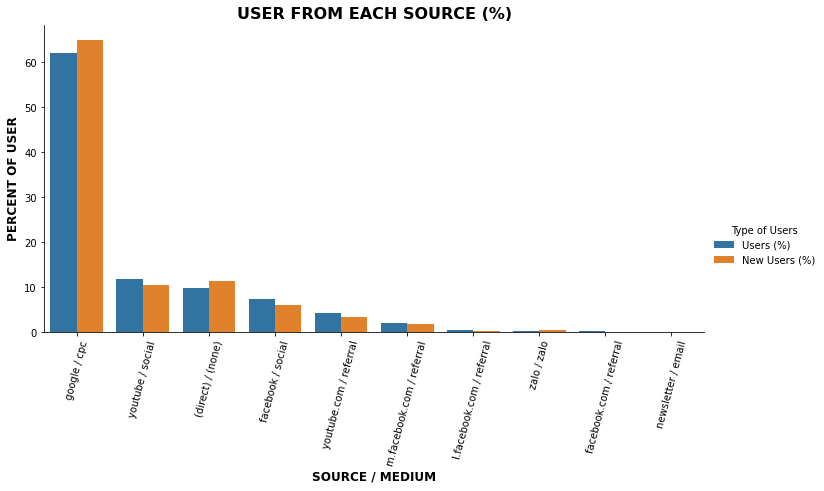

In [20]:
plt.figure(figsize=(12, 8))
sns.catplot(data=usersPercent, x="Source / Medium", y="Count", hue="Type of Users", kind="bar", height=5, aspect=2)
plt.title("USER FROM EACH SOURCE (%)", fontsize=16, fontweight='bold')
plt.xlabel("SOURCE / MEDIUM", fontsize=12, fontweight='bold')
plt.ylabel("PERCENT OF USER", fontsize=12, fontweight='bold')
plt.xticks(rotation=75)
plt.savefig("PERCENT_USER_FROM_EACH_SOURCE.png", bbox_inches = 'tight')
plt.show()

Text(0, 0.5, 'BOUNCE RATE')

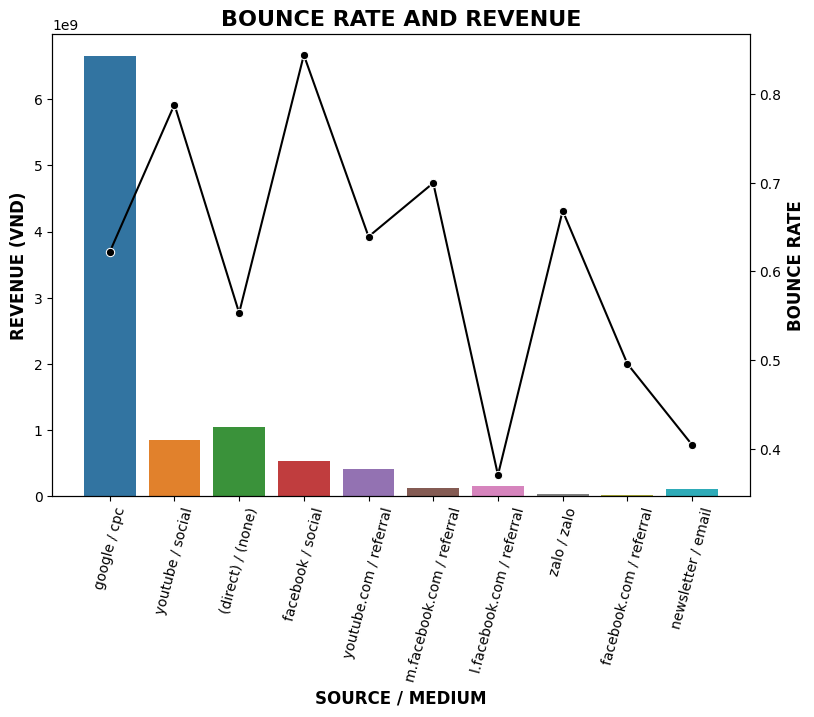

In [21]:
import matplotlib
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(9,6))
sns.barplot(data = newTrafficRevenue, x="Source / Medium", y="Revenue", ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = newTrafficRevenue['Bounce Rate'], marker='o', sort = False, ax=ax2, color='black')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 75)
ax1.set_title("BOUNCE RATE AND REVENUE", fontsize=16, fontweight='bold')
ax1.set_xlabel("SOURCE / MEDIUM", fontsize=12, fontweight='bold')
ax1.set_ylabel("REVENUE (VND)", fontsize=12, fontweight='bold')
ax2.set_ylabel("BOUNCE RATE", fontsize=12, fontweight='bold')

3.2. ANALYZED ON FACEBOOK SOURCE

In [22]:
def getDfBySource(source, data):
    """Function to create dataframe from a source"""
    row = [] #empty list storage row contain source
    for i in range(len(data)):
        if data["source"][i].find(source)!=-1:
            row.append(i) #append pos contain source
    
    return pd.concat([pd.DataFrame(data.iloc[[i]]) for i in row], ignore_index=True) #return a new dataframe contain source

In [23]:
def reshapedSource(data):
    """Function reshaped dataframe"""
    data = data.filter(["Source / Medium", "Users (%)", "New Users (%)", "Sessions (%)", "Revenue (%)"])
    data = pd.melt(data, id_vars="Source / Medium", var_name="Category", value_name="Count")
    return data

In [24]:
def sourcePlot(data):
    """Function plot source dataframe"""
    plt.figure(figsize=(12, 8))
    # sns.lineplot(data=data, x="source", y="Users (%)")
    # sns.lineplot(data=data, x="source", y="New Users (%)")
    # sns.lineplot(data=data, x="source", y="Sessions (%)")
    # sns.lineplot(data=data, x="source", y="Revenue (%)")
    sns.factorplot(x="Source / Medium", y="Count", hue="Category", data=data, kind='bar', size=4, aspect=3, ci=None)
    plt.title("SOURCE USERS/ NEW USERS/ SESSIONS/ REVENUE (%)", fontsize=16, fontweight='bold')
    plt.xlabel("SOURCE", fontsize=12, fontweight='bold')
    plt.ylabel("PENCENT (%)", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()

In [25]:
facebook = getDfBySource("facebook", newTraffic) #get dataframe by source=facebook
facebook = reshapedSource(facebook) #reshaped dataframe
facebook

,Source / Medium,Category,Count
0,facebook / social,Users (%),7.42
1,m.facebook.com / referral,Users (%),2.19
2,l.facebook.com / referral,Users (%),0.56
3,facebook.com / referral,Users (%),0.24
4,lm.facebook.com / referral,Users (%),0.02
5,touch.facebook.com / referral,Users (%),0.00
6,upload.facebook.com / referral,Users (%),0.00
7,facebook / social,New Users (%),6.19
8,m.facebook.com / referral,New Users (%),1.91
9,l.facebook.com / referral,New Users (%),0.32


c:\Users\ndqba\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\ndqba\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x800 with 0 Axes>

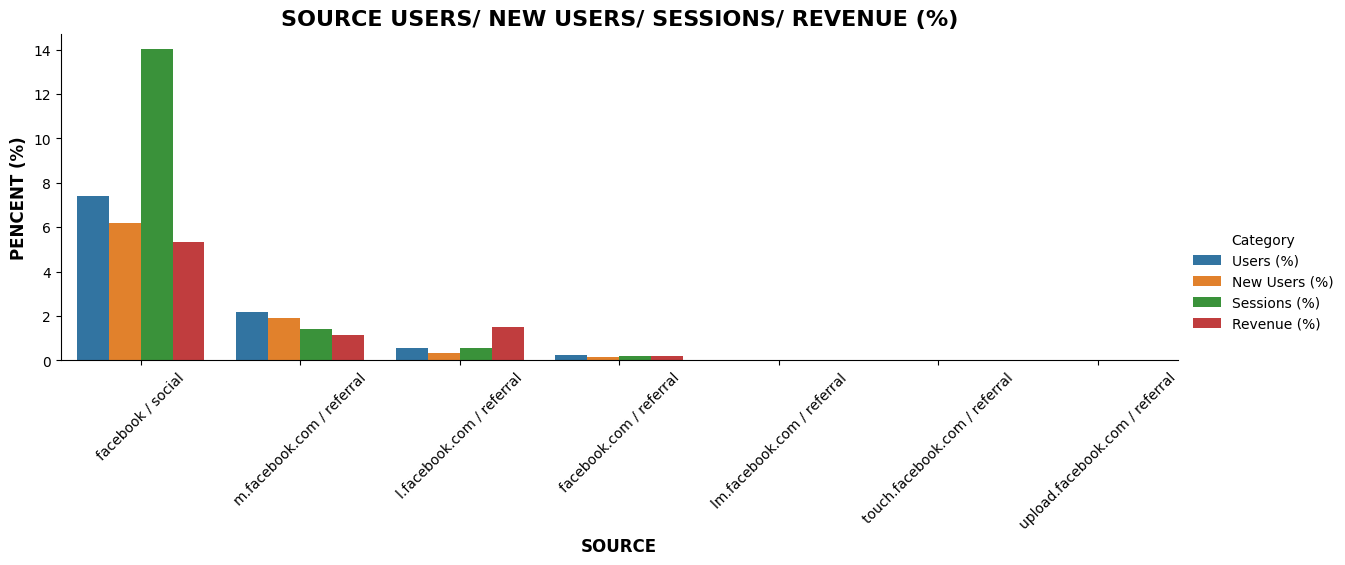

In [26]:
sourcePlot(facebook)

In [27]:
youtube = getDfBySource("youtube", newTraffic) #get dataframe by source=youtube
youtube = reshapedSource(youtube)#reshaped dataframe
youtube

,Source / Medium,Category,Count
0,youtube / social,Users (%),11.84
1,youtube.com / referral,Users (%),4.22
2,youtube / (not set),Users (%),0.26
3,m.youtube.com / referral,Users (%),0.00
4,youtube / social,New Users (%),10.48
5,youtube.com / referral,New Users (%),3.36
6,youtube / (not set),New Users (%),0.17
7,m.youtube.com / referral,New Users (%),0.00
8,youtube / social,Sessions (%),12.98
9,youtube.com / referral,Sessions (%),3.37


c:\Users\ndqba\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\ndqba\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x800 with 0 Axes>

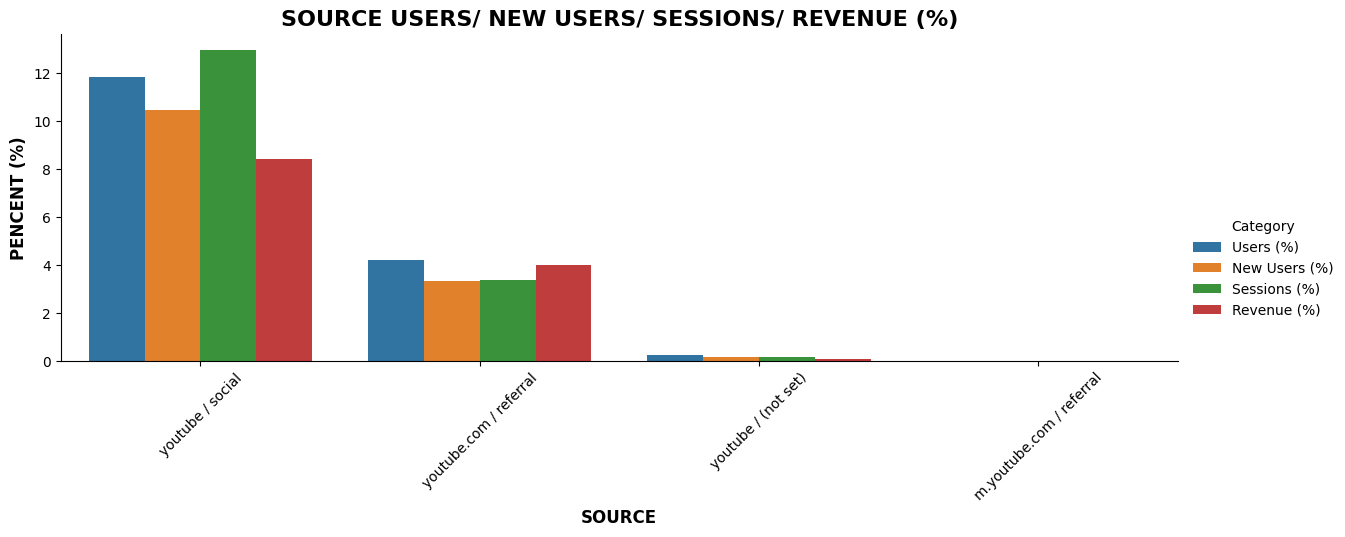

In [28]:
sourcePlot(youtube)

In [29]:
google = getDfBySource("google", newTraffic) #get dataframe by source=google
google = reshapedSource(google) #reshaped dataframe
google

,Source / Medium,Category,Count
0,google / cpc,Users (%),62.09
1,googleapis.com / referral,Users (%),0.21
2,googleweblight.com / referral,Users (%),0.00
3,google / cpc,Users (%),0.00
4,google.com / referral,Users (%),0.00
5,google.com.vn / referral,Users (%),0.00
6,imasdk.googleapis.com / referral,Users (%),0.00
7,search.google.com / referral,Users (%),0.00
8,tpc.googlesyndication.com / referral,Users (%),0.00
9,translate.google.com / referral,Users (%),0.00


c:\Users\ndqba\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\ndqba\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x800 with 0 Axes>

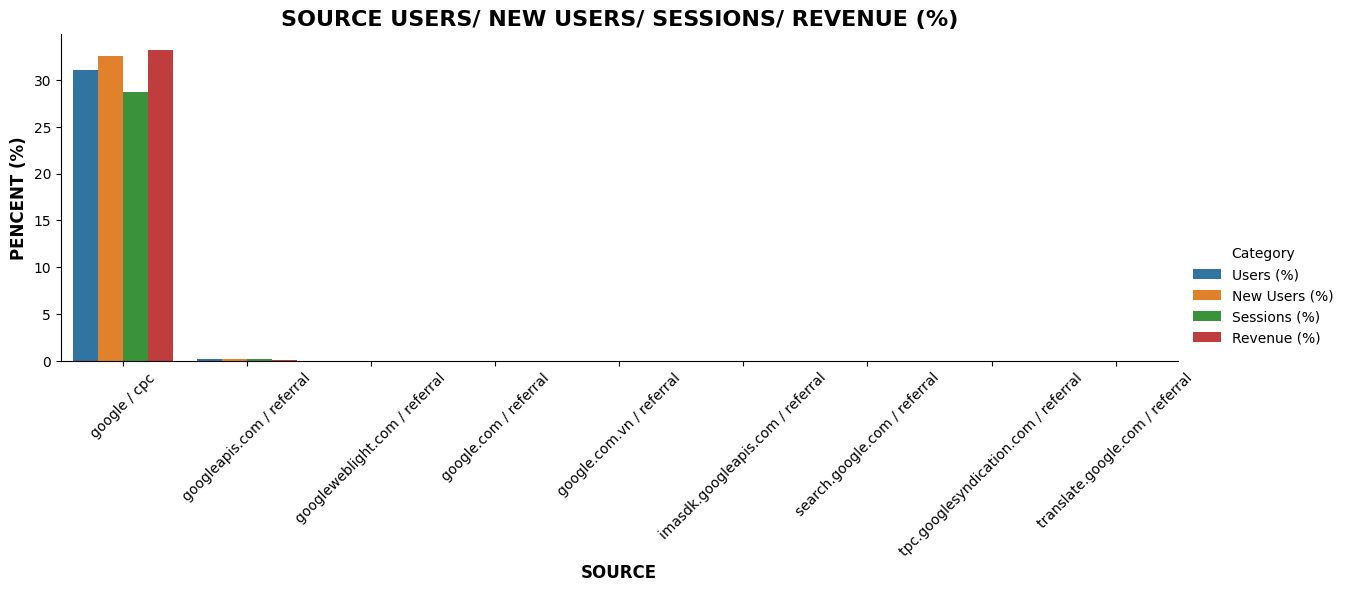

In [30]:
sourcePlot(google)

In [31]:
newletter = getDfBySource("newsletter", newTraffic) #get dataframe by source = newsletter
newletter = reshapedSource(newletter) #reshaped dataframe
newletter

,Source / Medium,Category,Count
0,newsletter / email,Users (%),0.12
1,newsletter / email,Users (%),0.05
2,newsletter / email,Users (%),0.03
3,newsletter / email,New Users (%),0.07
4,newsletter / email,New Users (%),0.03
5,newsletter / email,New Users (%),0.02
6,newsletter / email,Sessions (%),0.17
7,newsletter / email,Sessions (%),0.05
8,newsletter / email,Sessions (%),0.04
9,newsletter / email,Revenue (%),0.99


c:\Users\ndqba\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\ndqba\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x800 with 0 Axes>

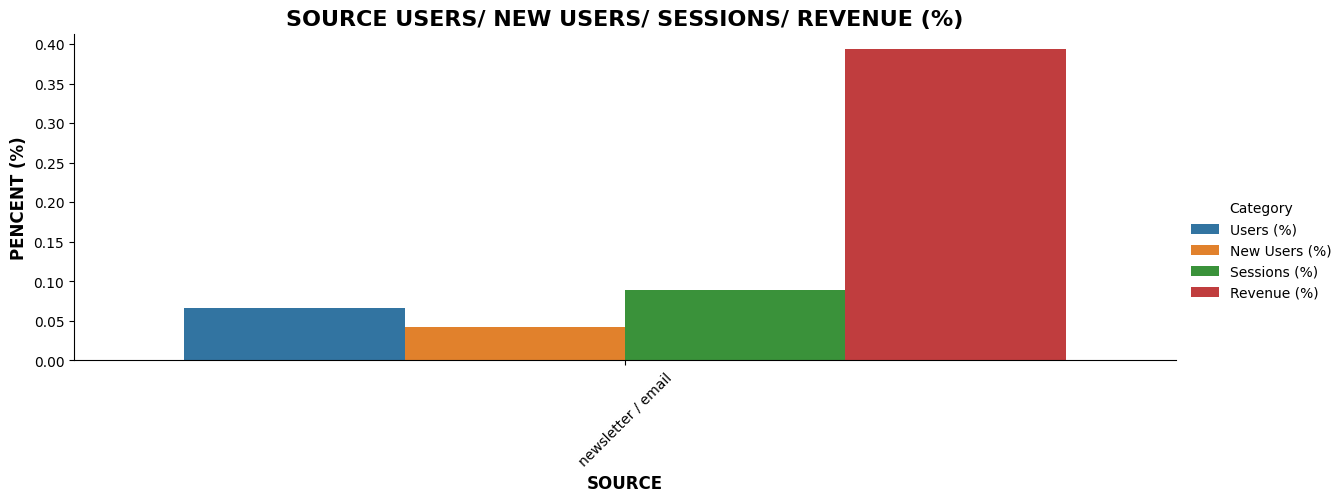

In [32]:
sourcePlot(newletter)

In [33]:
zalo = getDfBySource("zalo", newTraffic) #get df by source=zalo
zalo = reshapedSource(zalo) #reshaped df
zalo

,Source / Medium,Category,Count
0,zalo / zalo,Users (%),0.42
1,zalo / (not set),Users (%),0.00
2,zalo / zalo,New Users (%),0.45
3,zalo / (not set),New Users (%),0.00
4,zalo / zalo,Sessions (%),0.32
5,zalo / (not set),Sessions (%),0.00
6,zalo / zalo,Revenue (%),0.37
7,zalo / (not set),Revenue (%),0.00


c:\Users\ndqba\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\ndqba\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x800 with 0 Axes>

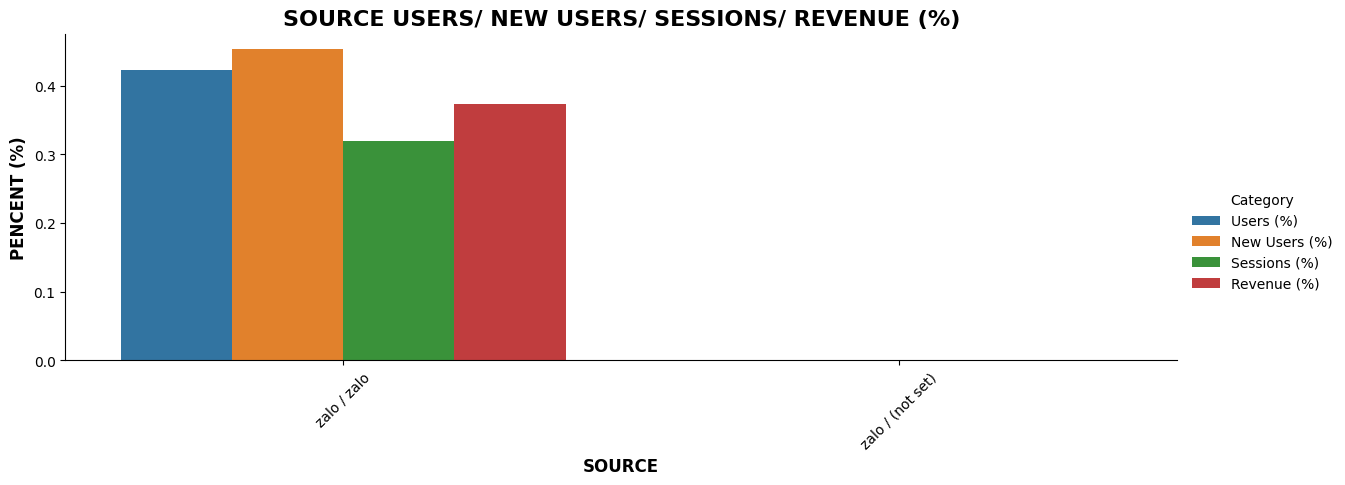

In [34]:
sourcePlot(zalo)

In [35]:
newTrafficRevenue

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,source,medium,Users (%),New Users (%),Sessions (%),Revenue (%),Mean Revenue/Transactions
0,google / cpc,407950,344502,723208,0.62,3.56,176.03,0.01,6566,6656088123.79,google,cpc,62.09,65.04,57.42,66.52,1013720.40
1,youtube / social,77785,55537,163447,0.79,2.24,89.94,0.01,957,842907936.03,youtube,social,11.84,10.48,12.98,8.42,880781.54
2,(direct) / (none),64653,60181,108534,0.55,4.12,200.43,0.01,1048,1040851446.85,(direct),(none),9.84,11.36,8.62,10.40,993178.86
3,facebook / social,48721,32781,176662,0.84,1.86,73.21,0.00,500,534485686.27,facebook,social,7.42,6.19,14.03,5.34,1068971.37
4,youtube.com / referral,27718,17774,42464,0.64,2.98,148.44,0.01,508,402541914.82,youtube.com,referral,4.22,3.36,3.37,4.02,792405.34
5,m.facebook.com / referral,14373,10110,17631,0.70,2.24,87.39,0.01,127,114188784.45,m.facebook.com,referral,2.19,1.91,1.40,1.14,899124.29
6,l.facebook.com / referral,3661,1712,7144,0.37,6.87,736.73,0.01,103,150801642.13,l.facebook.com,referral,0.56,0.32,0.57,1.51,1464093.61
7,zalo / zalo,2782,2400,4029,0.67,2.53,147.25,0.01,43,37327813.27,zalo,zalo,0.42,0.45,0.32,0.37,868088.68
8,facebook.com / referral,1594,694,2557,0.50,4.67,288.27,0.01,29,20931450.21,facebook.com,referral,0.24,0.13,0.20,0.21,721774.15
9,newsletter / email,781,393,2168,0.40,5.88,332.00,0.03,61,98910794.42,newsletter,email,0.12,0.07,0.17,0.99,1621488.43


3.3. TRANSACTIONS AND REVENUE

In [36]:
a = newTrafficRevenue.filter(["Source / Medium", "Pages / Session", "Avg. Session Duration",	"Ecommerce Conversion Rate",	"Transactions"])

In [37]:
a

,Source / Medium,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions
0,google / cpc,3.56,176.03,0.01,6566
1,youtube / social,2.24,89.94,0.01,957
2,(direct) / (none),4.12,200.43,0.01,1048
3,facebook / social,1.86,73.21,0.00,500
4,youtube.com / referral,2.98,148.44,0.01,508
5,m.facebook.com / referral,2.24,87.39,0.01,127
6,l.facebook.com / referral,6.87,736.73,0.01,103
7,zalo / zalo,2.53,147.25,0.01,43
8,facebook.com / referral,4.67,288.27,0.01,29
9,newsletter / email,5.88,332.00,0.03,61
